<ul>
<li><strong>Transfer learning is a popular deep learning method that follows the approach of using the knowledge that was learned in some task and applying it to solve the problem of the related target task</strong></li>
</ul>

<p><span style="color: #ffff99;"><strong>Pre-trained model:&nbsp;</strong>Pre-trained models are the deep learning models which are trained on very large datasets, developed, and are made available by other developers</span></p>

<p><span style="color: #ffff99;"><strong>InceptionResNetV2:&nbsp;</strong>InceptionResNetV2 is a convolutional neural network that is 164 layers deep, trained on millions of images from the ImageNet database, and can classify images into more than 1000 categories such as flowers, animals, etc. The input size of the images is 299-by-299</span></p>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix

# deep learning libraries
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import applications
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dense, Dropout
from keras.preprocessing import image

import cv2

import warnings
warnings.filterwarnings('ignore')


<ul>
<li><span style="color: #ffff99;">The dataset used comprises of 120 breeds of dogs in total.</span></li>
<li><span style="color: #ffff99;">Each image has a file name which is its unique id.</span></li>
<li><span style="color: #ffff99;"><u>Train dataset ( train.zip )</u>: contains 10,222 images which are to be used for training our model</span></li>
<li><span style="color: #ffff99;"><u>Test dataset (test.zip )</u>: contains 10,357 images which we have to classify into the respective categories or labels</span></li>
<li><span style="color: #ffff99;"><u>labels.csv</u>: contains breed names corresponding to the image id.</span></li>
<li><span style="color: #ffff99;"><u>sample_submission.csv</u>: contains correct form of sample submission to be made</span></li>
</ul>

In [2]:
# from google.colab import drive
# drive.mount("/content/drive")

# datasets
# labels = pd.read_csv("/content/drive/My Drive/dog/labels.csv")
labels = pd.read_csv("doglabels.csv")
# sample = pd.read_csv('/content/drive/My Drive/dog/sample_submission.csv')

# folders paths
# train_path = "/content/drive/MyDrive/dog/train"
train_path = r"D:\CSV original\dog breeds\train dog"
# test_path = "/content/drive/MyDrive/dog/test"
test_path = r"D:\CSV original\dog breeds\test dog"


In [3]:
labels.head()


id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

<ul>
<li><span style="color: #ffff99;"><strong>Adding &lsquo;.jpg&rsquo; extension to each id&nbsp;</strong></span>
<ul>
<li><span style="color: #ffff99;">This is done in order to fetch the images from the folder since the image name and id&rsquo;s are the same so adding&nbsp;<em>.jpg</em>&nbsp;extension will help us in retrieving images easily</span>.</li>
</ul>
</li>
</ul>

In [4]:
def to_jpg(id):
	return id+".jpg"


labels['id'] = labels['id'].apply(to_jpg)
# sample['id'] = sample['id'].apply(to_jpg)
labels.head()


id             breed
0  000bec180eb18c7604dcecc8fe0dba07.jpg       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97.jpg             dingo
2  001cdf01b096e06d78e9e5112d419397.jpg          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d.jpg          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62.jpg  golden_retriever

<ul>
<li>
<h3><span style="color: #ffff99;"><strong>Augmenting data:</strong> </span></h3>
<ul>
<li><span style="color: #ffff99;">It&rsquo;s a pre-processing technique in which we augment the existing dataset with transformed versions of the existing images. We can perform scaling, rotations, increasing brightness, and other affine transformations. This is a useful technique as it helps the model to generalize the unseen data well. ImageDataGenerator class is used for this purpose which provides a real-time augmentation of data.a Description of few of its parameters that are used below:</span>
<ul>
<li><span style="color: #ffff99;"> rescale: rescales values by the given factor </span></li>
<li><span style="color: #ffff99;">horizontal flip: randomly flip inputs horizontally. </span></li>
<li><span style="color: #ffff99;">validation_split: this is the fraction of images reserved for validation (between 0 and 1)</span></li>
</ul>
</li>
</ul>
</li>
</ul>

<ul>
<li>
<div>
<h3><span style="color: #99ccff;"><strong>flow_from_dataframe</strong></span></h3>
</div>
<p><span style="color: #99ccff;"><strong>:dataframe- Pandas DataFrame which contains the filenames and classes or numeric data to be treated as target values </strong></span></p>
<ul>
<li><span style="color: #99ccff;"><strong><strong class="lf fp">has_ext attribute is deprecated, So make sure the x_col column in your dataframe has the entire filenames (including extensions) of the images0</strong></strong></span></li>
</ul>
</li>
<li><span style="color: #99ccff;"><strong><strong class="lf fp">directory- Path to the folder which contains all the images,None&nbsp;if x_col contains absolute paths pointing to each image instead of just filenames.<br />x_col- The column in the dataframe that has the filenames of the images<br />y_col- The column/columns in the dataframe in the filename that will be treated as raw target values if&nbsp;class_mode=&rdquo;raw&rdquo;&nbsp;(useful for regression tasks) or they will be treated as name of the classes if class_mode is &ldquo;binary&rdquo;/&rdquo;categorical&rdquo; or they will be ignored if class_mode is &ldquo;input&rdquo;/None.<br />class_mode-&nbsp;In addition to all the class_modes previously available in flow_from_directory, there is &ldquo;raw&rdquo;.</strong></strong></span></li>
</ul>

In [5]:
# Data agumentation and pre-processing using tensorflow
gen = ImageDataGenerator(
				rescale=1./255.,
				horizontal_flip = True,#randomly does it
				validation_split=0.2 # training: 80% data, validation: 20% data
				)

train_generator = gen.flow_from_dataframe(
	labels, # dataframe,if the data frame contains image names then you need to specify the directory where these images are residing
	directory = train_path, # images data path / folder in which images are there
	x_col = 'id',
	y_col = 'breed',
	subset="training",#You can pass validation_split argument (a number between 0 and 1) to ImageDataGenerator class instance to split the data into train and validation sets
					  #And then pass subset argument to flow_from_directory to specify training and validation generators
					  #If you have set augmentation parameters for the ImageDataGenerator, then by using this solution both training and validation images will be augmented
	color_mode="rgb",#You can also convert the color of the images using the “color_mode” argument. Available options are “grayscale“, “rgb“, “rgba
	target_size = (331,331), # image height , image width
	class_mode="categorical",#If “binary“, the labels are “0” and “1”.
								#For “categorical“, we will have 2D one-hot encoded labels
							# If “sparse”, 1D integer labels
	batch_size=32,
	shuffle=True,
	seed=42,
)


validation_generator = gen.flow_from_dataframe(
	labels, # dataframe
	directory = train_path, # images data path / folder in which images are there
	x_col = 'id',
	y_col = 'breed',
	subset="validation",
	color_mode="rgb",
	target_size = (331,331), # image height , image width
	class_mode="categorical",
	batch_size=32,
	shuffle=True,
	seed=42,
)


Found 8178 validated image filenames belonging to 120 classes.
Found 2044 validated image filenames belonging to 120 classes.


<p><strong><span style="color: #ff9900;">Let&rsquo;s see what a single batch of data looks like</span></strong></p>

In [6]:
x,y = next(train_generator)


In [7]:
x.shape # input shape of one record is (331,331,3) , 32: is the batch size


(32, 331, 331, 3)

In [8]:
print(y.shape)
y   #y will be 32*120 matrix consisting the one-hot coded values for categorical labels

(32, 120)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

<p><span style="color: #ccffff;"><strong>Plotting images from the train dataset</strong></span></p>

In [9]:
a = train_generator.class_indices
print(type(a))
a


<class 'dict'>


{'affenpinscher': 0,
 'afghan_hound': 1,
 'african_hunting_dog': 2,
 'airedale': 3,
 'american_staffordshire_terrier': 4,
 'appenzeller': 5,
 'australian_terrier': 6,
 'basenji': 7,
 'basset': 8,
 'beagle': 9,
 'bedlington_terrier': 10,
 'bernese_mountain_dog': 11,
 'black-and-tan_coonhound': 12,
 'blenheim_spaniel': 13,
 'bloodhound': 14,
 'bluetick': 15,
 'border_collie': 16,
 'border_terrier': 17,
 'borzoi': 18,
 'boston_bull': 19,
 'bouvier_des_flandres': 20,
 'boxer': 21,
 'brabancon_griffon': 22,
 'briard': 23,
 'brittany_spaniel': 24,
 'bull_mastiff': 25,
 'cairn': 26,
 'cardigan': 27,
 'chesapeake_bay_retriever': 28,
 'chihuahua': 29,
 'chow': 30,
 'clumber': 31,
 'cocker_spaniel': 32,
 'collie': 33,
 'curly-coated_retriever': 34,
 'dandie_dinmont': 35,
 'dhole': 36,
 'dingo': 37,
 'doberman': 38,
 'english_foxhound': 39,
 'english_setter': 40,
 'english_springer': 41,
 'entlebucher': 42,
 'eskimo_dog': 43,
 'flat-coated_retriever': 44,
 'french_bulldog': 45,
 'german_shepherd'

In [10]:
class_names = list(a.keys()) # storing class/breed names in a list
class_names


['affenpinscher',
 'afghan_hound',
 'african_hunting_dog',
 'airedale',
 'american_staffordshire_terrier',
 'appenzeller',
 'australian_terrier',
 'basenji',
 'basset',
 'beagle',
 'bedlington_terrier',
 'bernese_mountain_dog',
 'black-and-tan_coonhound',
 'blenheim_spaniel',
 'bloodhound',
 'bluetick',
 'border_collie',
 'border_terrier',
 'borzoi',
 'boston_bull',
 'bouvier_des_flandres',
 'boxer',
 'brabancon_griffon',
 'briard',
 'brittany_spaniel',
 'bull_mastiff',
 'cairn',
 'cardigan',
 'chesapeake_bay_retriever',
 'chihuahua',
 'chow',
 'clumber',
 'cocker_spaniel',
 'collie',
 'curly-coated_retriever',
 'dandie_dinmont',
 'dhole',
 'dingo',
 'doberman',
 'english_foxhound',
 'english_setter',
 'english_springer',
 'entlebucher',
 'eskimo_dog',
 'flat-coated_retriever',
 'french_bulldog',
 'german_shepherd',
 'german_short-haired_pointer',
 'giant_schnauzer',
 'golden_retriever',
 'gordon_setter',
 'great_dane',
 'great_pyrenees',
 'greater_swiss_mountain_dog',
 'groenendael',


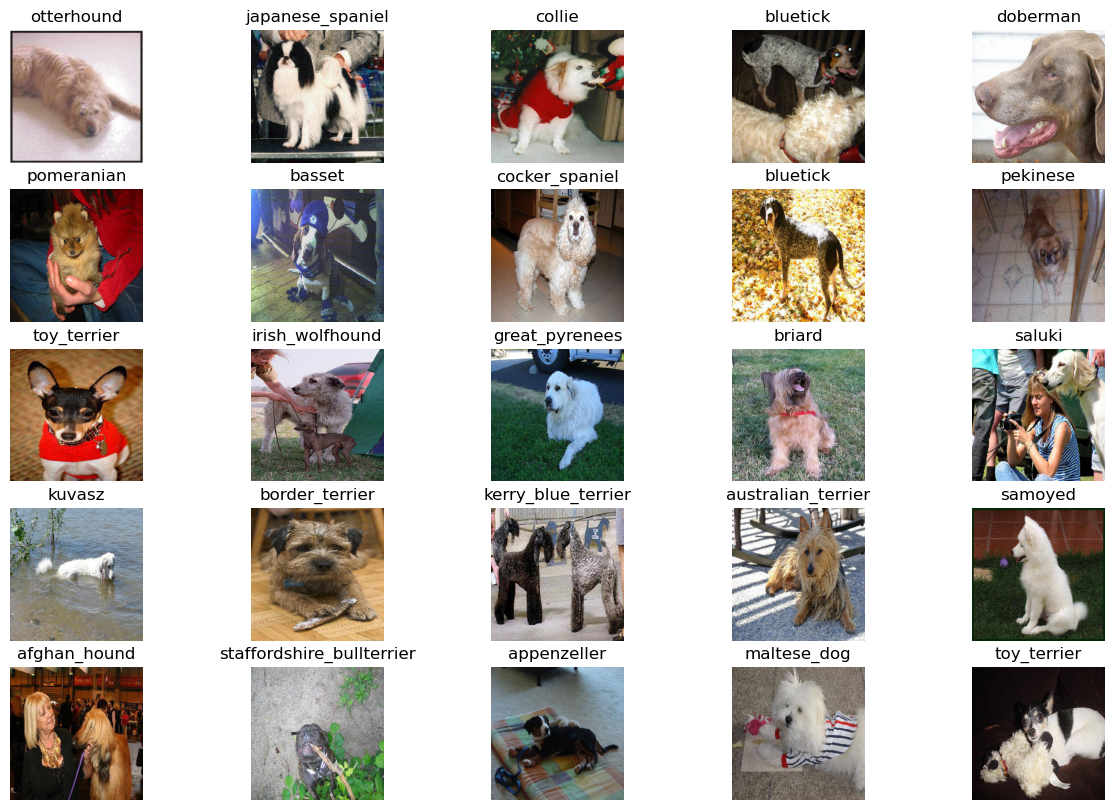

In [11]:

def plot_images(img, labels):
	plt.figure(figsize=[15, 10])
	for i in range(25):
		plt.subplot(5, 5, i+1)	#notice i+1
		plt.imshow(img[i])
		plt.title(class_names[np.argmax(labels[i])])	#np.argmax:Returns the indices of the maximum values along an axis
														#labels which are the same y infact are labels of those 32 images which are one-hot encoded
														#class_names[np.argmax(labels[i])]:returnes the name of respective breed
		plt.axis('off')	# we can turn off the axis and display
						# by passing the 
						# optional parameter 'off' to it

plot_images(x,y)


<ul>
<li>
<h3><span style="color: #99ccff;">Building our Model</span></h3>
</li>
</ul>

<p><span style="color: #ffff99;">Steps for fine-tuning a network are as follow: </span></p>
<ul>
<li><span style="color: #ffff99;">Add your custom network on top of an already trained base network. </span></li>
<li><span style="color: #ffff99;">Freeze the base network. </span></li>
<li><span style="color: #ffff99;">Train the part you added. </span></li>
<li><span style="color: #ffff99;">Unfreeze some layers in the base network. Jointly train both these layers and the part you added</span></li>
</ul>

In [13]:
from keras.applications import InceptionResNetV2
# base_model = tf.keras.applications.InceptionResNetV2(   #all this function is run in colab because imagenet weights are not downloaded in Iran
#                      include_top=False,
#                      weights='imagenet',
#                      input_shape=(331,331,3)
#                      )
# conv_base.save_weights('conv_basewieghts.h5') #this line of code is also run in colab to save the weights
base_model = tf.keras.applications.InceptionResNetV2(   
                     include_top=False,
                     weights=None,
                     input_shape=(331,331,3)
                     )
base_model.load_weights(r"C:\Users\Mahdi\Desktop\machine learning projects for beginners\deep\Dog breed classification using Transfer learning\base_model331wieghts.h5")

base_model.summary()


Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 331, 331, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_203 (Conv2D)            (None, 165, 165, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_203 (Batch  (None, 165, 165, 32  96         ['conv2d_203[0][0]']             
 Normalization)                 )                                               

In [14]:
len(base_model.layers)

780

In [15]:

from keras.utils import plot_model
plot_model(base_model, to_file='model.png')

<ul>
<li><span style="color: #ff9900;">adding layers to base model</span></li>
</ul>

<ul>
<li>
<h2><span style="color: #ffcc00;"><strong>Batch normalization</strong></span></h2>
<ul>
<li><span style="color: #ffcc00;"><strong> (also known as batch norm) is&nbsp;a method used to make training of artificial neural networks faster and more stable through normalization of the&nbsp;<span tabindex="0" role="tooltip"><span class="c5aZPb" tabindex="0" role="button" data-enable-toggle-animation="true" data-extra-container-classes="ZLo7Eb" data-hover-hide-delay="1000" data-hover-open-delay="500" data-send-open-event="true" data-theme="0" data-width="250" data-ved="2ahUKEwiDu_zjpLv_AhXiR_EDHcTPCYgQmpgGegQIIxAD"><span class="JPfdse" data-bubble-link="" data-segment-text="layers">layers</span></span></span>' inputs by re-centering and re-scaling, is done along mini-batches instead of the full data set,It is used to speed up training and use higher learning rates,It maintains the mean output close to 0 and the output standard deviation close to 1</strong></span></li>
</ul>
</li>
</ul>

<p><span style="color: #ff99cc;"><strong>GlobalAveragePooling2D&nbsp;</strong>:</span></p>
<ul>
<li><span style="color: #ff99cc;">It takes a tensor of size (input width) x (input height) x (input channels) and computes the average value of all values across the entire (input width) x (input height) matrix for each of the (input channels).</span></li>
<li><span style="color: #ff99cc;">The dimensionality of the images is reduced by reducing the number of pixels in the output from the previous neural network layer.</span></li>
<li><span style="color: #ff99cc;">By using this we get a 1-dimensional tensor of size (input channels) as our output.</span></li>
<li><span style="color: #ff99cc;">2D Global average pooling operation. Here &lsquo;Depth&rsquo; = &lsquo;Filters&rsquo;</span></li>
</ul>

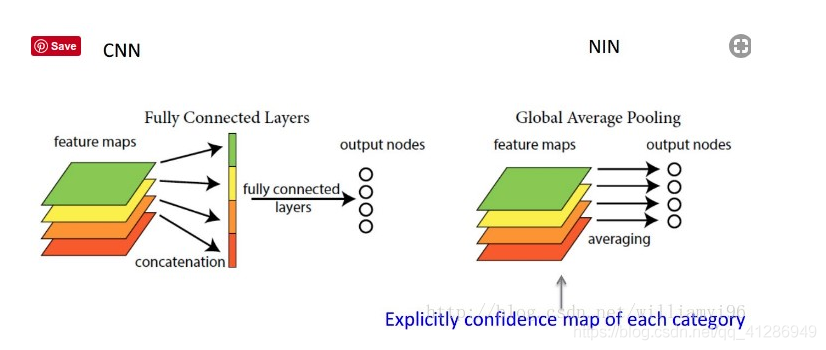

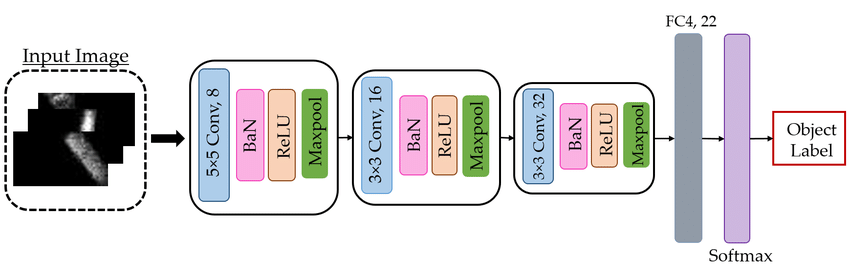

In [16]:
base_model.trainable=False
# For freezing the layer we make use of layer.trainable = False
# means that its internal state will not change during training.
# model's trainable weights will not be updated during fit(),
# and also its state updates will not run.
 
model = tf.keras.Sequential([
        base_model,  
        tf.keras.layers.BatchNormalization(renorm=True),    #renorm:Whether to use Batch Renormalization 
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(120, activation='softmax')
    ])

In [17]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# categorical cross entropy is taken since its used as a loss function for
# multi-class classification problems where there are two or more output labels.
# using Adam optimizer for better performance
# other optimizers such as sgd can also be used depending upon the model


In [18]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 9, 9, 1536)       54336736  
 onal)                                                           
                                                                 
 batch_normalization_406 (Ba  (None, 9, 9, 1536)       10752     
 tchNormalization)                                               
                                                                 
 global_average_pooling2d (G  (None, 1536)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               786944    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                        

<h2><span style="color: #ff9900;">Callback:</span></h2>
<ul>
<li><span style="color: #ff9900;">&nbsp;It is an object that can perform actions at various stages of training (for example, at the start or end of an epoch, before or after a single batch, etc)</span></li>
</ul>

<h5><span style="color: #ffff99;">Early stopping requires that a validation dataset is evaluated during trainingوThis can be achieved by specifying the validation dataset to the fit() function when training your model.
There are two ways of doing this:
The first involves you manually splitting your training data into a train and validation dataset and specifying the validation dataset to the fit() function via the validation_data argument as we did here</span></h4>

<p><span style="color: #ffff99;">Alternately, the fit() function can automatically split your training dataset into train and validation sets based on a percentage split specified via the validation_split argument. The validation_split is a value between 0 and 1 and defines the percentage amount of the training dataset to use for the validation dataset. For example:</span></p>
<p><span style="color: #ffff99;"><span class="crayon-v">model</span><span class="crayon-sy">.</span><span class="crayon-e">fit</span><span class="crayon-sy">(</span><span class="crayon-v">train_X</span><span class="crayon-sy">,</span> <span class="crayon-v">train_y</span><span class="crayon-sy">,</span> <span class="crayon-v">validation_split</span><span class="crayon-o">=</span><span class="crayon-cn">0.3</span><span class="crayon-sy">)</span></span></p>

In [19]:
early = tf.keras.callbacks.EarlyStopping( patience=10,
										min_delta=0.001,
										restore_best_weights=True)
# early stopping call back


In [20]:
train_generator.n   #when running train generator function block 8178=10222*.8 images were chosen for training,and the rest for validation
                    #10357 images in another folder for test are left
                    #the question which should be solved later is that as 8177 images are considered for training then what does augmentation do
                    # on them as that doesnt change the number of iamges
                    # and leaves that unchanged  

8178

<p><span style="color: #ffff99;">steps_per_epoch: </span></p>
<ul>
<li><span style="color: #ffff99;">Total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch</span></li>
</ul>

In [21]:

batch_size=32
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = validation_generator.n//validation_generator.batch_size

# fit model
history = model.fit(train_generator,
					steps_per_epoch=STEP_SIZE_TRAIN,
					validation_data=validation_generator,
					validation_steps=STEP_SIZE_VALID,
					epochs=2,
					callbacks=[early])


Epoch 1/2
255/255 [==============================] - 3842s 15s/step - loss: 1.5149 - accuracy: 0.6781 - val_loss: 0.4534 - val_accuracy: 0.8805
Epoch 2/2
255/255 [==============================] - 3867s 15s/step - loss: 0.5163 - accuracy: 0.8696 - val_loss: 0.4086 - val_accuracy: 0.8943


<p><span style="color: #ffff99;">We can save the model for further use</span></p>


<p><span style="color: #99ccff;">of course last layers of base model should be unfreezed and then the whole model be trained for another time</span></p>

In [22]:
model.save("Model.h5")


<p><span style="color: #ffff99;"><strong>Visualizing the model&rsquo;s performance</strong></span></p>

<p><span style="color: #ffff99;">You can dynamically change the default rc (runtime configuration) settings in a python script or interactively from the python shell. All rc settings are stored in a dictionary-like variable called&nbsp;<a class="reference internal" style="color: #ffff99;" title="matplotlib.rcParams" href="https://matplotlib.org/stable/api/matplotlib_configuration_api.html#matplotlib.rcParams"><code class="xref py py-data docutils literal notranslate"><span class="pre">matplotlib.rcParams</span></code></a>,</span></p>

<p><span style="color: #99ccff;">The&nbsp;<code class="w3-codespan">subplot()</code>&nbsp;function takes three arguments that describes the layout of the figure.</span></p>
<p><span style="color: #99ccff;">The layout is organized in rows and columns, which are represented by the&nbsp;<em>first&nbsp;</em>and&nbsp;<em>second&nbsp;</em>argument.</span></p>
<p><span style="color: #99ccff;">The third argument represents the index of the current plot</span></p>

In [23]:
print(history.history)  #history is a dictionary consisting of loss,accuracy,validation loss,validation accuracy for all epochs

{'loss': [1.5148999691009521, 0.5162875056266785], 'accuracy': [0.6781242489814758, 0.8696292638778687], 'val_loss': [0.453433096408844, 0.40861979126930237], 'val_accuracy': [0.8804563283920288, 0.894345223903656]}


Text(0.5, 1.0, '\nTraining and Validation Accuracy. \nTrain Accuracy:0.8696292638778687\nValidation Accuracy: 0.894345223903656')

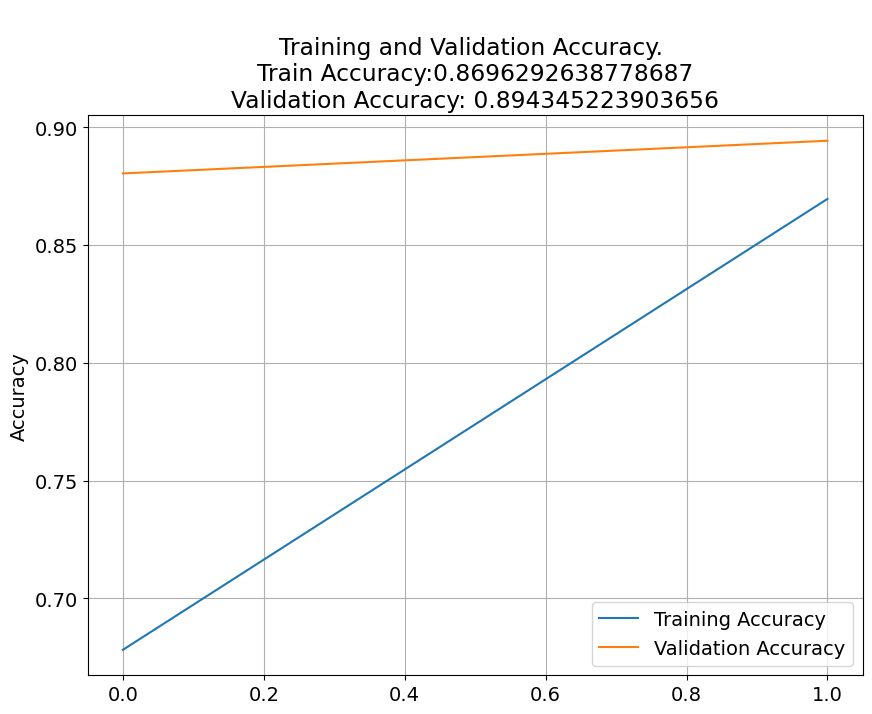

In [39]:
# store results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


# plot results
# accuracy
plt.figure(figsize=(10, 16))
plt.rcParams['figure.figsize'] = [8, 4]	#rc:runtime configuration
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True	#Configure the grid lines
plt.rcParams['figure.facecolor'] = 'white'
plt.subplot(2, 1, 1)	#2 rows 1 columns and this plot is the first
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title(f'\nTraining and Validation Accuracy. \nTrain Accuracy:{str(acc[-1])}\nValidation Accuracy: {str(val_acc[-1])}')	#a blank space followed by a slash determines that the line is continued


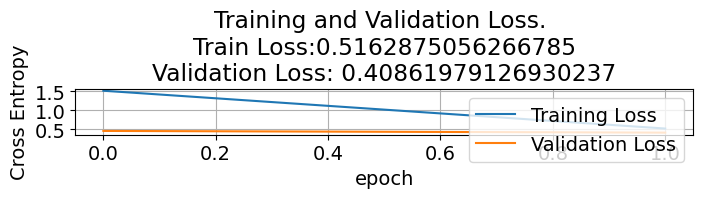

In [41]:
# loss
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title(f'Training and Validation Loss. \nTrain Loss:{str(loss[-1])}\nValidation Loss: {str(val_loss[-1])}')
plt.xlabel('epoch')
plt.tight_layout(pad=3.0)   #Adjust the padding between and around subplots,pad:Padding between the figure edge and the edges of subplots, as a fraction of the font size
plt.show()


<h4><span style="color: #99ccff;">Evaluating the accuracy of the model</span></h4>

<p><span style="color: #ffff99;">model.evaluate:does the evaluation of the model.  returns scalar test loss if the model has a single output and no metrics or a list of scalars if the model has multiple outputs and multiple metrics.The attribute model.metrics_names will give you the display labels for the scalar outputs and metrics names.and outputs those metrics.It has three main arguments:</span></p>
<p><span style="color: #ffff99;"> Test data </span></p>
<p><span style="color: #ffff99;">Test data label </span></p>
<p><span style="color: #ffff99;">verbose: true or false</span></p>

In [42]:
model.metrics_names


['loss', 'accuracy']

In [43]:
#from above code it is infered that model.evaluate returnes a list that first index has loss and second has accuracy
accuracy_score = model.evaluate(validation_generator)
print(accuracy_score)
print("Accuracy: {:.4f}%".format(accuracy_score[1] * 100))

print("Loss: ",accuracy_score[0])


64/64 [==============================] - 817s 13s/step - loss: 0.4030 - accuracy: 0.8943
[0.4029947817325592, 0.8943248391151428]
Accuracy: 89.4325%
Loss:  0.4029947817325592


<p><span style="color: #ffff99;">Viewing the Test Imag</span>e</p>

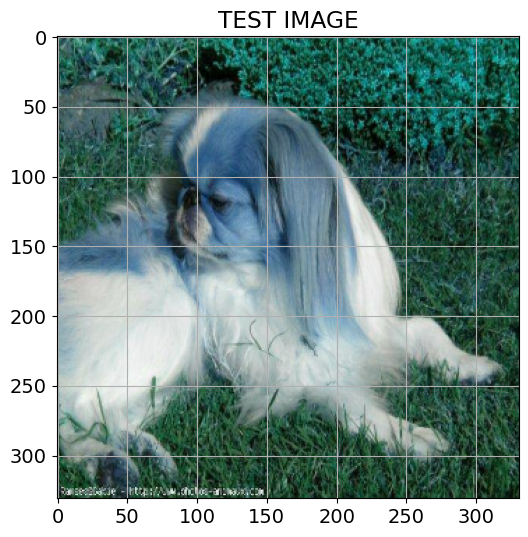

In [44]:
test_img_path = f"{test_path}/000621fb3cbb32d8935728e48679680e.jpg"

img = cv2.imread(test_img_path)
resized_img = cv2.resize(img, (331, 331)).reshape(-1, 331, 331, 3)/255  #-1 lets reshape to figure the dimension out itself but why does that do it here 

plt.figure(figsize=(6,6))
plt.title("TEST IMAGE")
plt.imshow(resized_img[0])


<p><span style="color: #ffff99;"><strong>Making predictions on the test data</strong></span></p>

In [ ]:
predictions = []

for image in sample.id:
	img = tf.keras.preprocessing.image.load_img(test_path +'/'+ image)
	img = tf.keras.preprocessing.image.img_to_array(img)    #img_to_array:Converts a PIL Image instance to a Numpy array.PIL stands for Python Imaging Library, 
                                                            #and it's the original library that enabled Python to deal with images
	img = tf.keras.preprocessing.image.smart_resize(img, (331, 331))    #Resize images to a target size without aspect ratio distortion
	img = tf.reshape(img, (-1, 331, 331, 3))
	prediction = model.predict(img/255)
	predictions.append(np.argmax(prediction))

my_submission = pd.DataFrame({'image_id': sample.id, 'label': predictions})
my_submission.to_csv('submission.csv', index=False)

# Submission file output
print("Submission File: \n---------------\n")
print(my_submission.head()) # Displaying first five predicted output
